<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/AutoGluon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def eval(yact,ypred):
 from sklearn import metrics
 print("Accuracy:",metrics.accuracy_score(yact, ypred))
 print("Precision:",metrics.precision_score(yact, ypred))
 print("Recall:",metrics.recall_score(yact, ypred))

 cnf_matrix = metrics.confusion_matrix(yact, ypred)
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 class_names=[0,1] # name  of classes
 fig, ax = plt.subplots()
 tick_marks = np.arange(len(class_names))
 plt.xticks(tick_marks, class_names)
 plt.yticks(tick_marks, class_names)
 # create heatmap
 sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
 ax.xaxis.set_label_position("top")
 plt.tight_layout()
 plt.title('Confusion matrix', y=1.1)
 plt.ylabel('Actual label')
 plt.xlabel('Predicted label')

In [2]:
!pip install autogluon.tabular

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.2/352.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.2/266.2 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [3]:
#Do not forget to restart runtime
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor
df=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/healthcare-dataset-stroke-data.csv')

In [4]:
df_train,df_test=train_test_split(df,test_size=0.33,random_state=1)
df_train.shape,df_test.shape

((3423, 12), (1687, 12))

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
y_test=df_test['stroke']
test_data=df_test.drop(['stroke'],axis=1)
test_data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4673,49833,Female,42.0,0,0,Yes,Govt_job,Rural,112.98,37.2,formerly smoked
3232,20375,Female,78.0,0,0,Yes,Private,Urban,78.29,30.1,formerly smoked
3694,39834,Male,28.0,0,0,No,Private,Urban,73.27,25.4,smokes
1070,42550,Female,81.0,0,0,Yes,Self-employed,Rural,246.34,21.1,never smoked
4163,19907,Female,52.0,0,0,Yes,Private,Rural,97.05,28.0,Unknown


In [7]:
predictor= TabularPredictor(label ='stroke').fit(train_data = df_train, verbosity = 2)

No path specified. Models will be saved in: "AutogluonModels/ag-20250401_203051"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.15 GB / 12.67 GB (88.0%)
Disk Space Avail:   70.42 GB / 107.72 GB (65.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

In [8]:
predictor.fit_summary()

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2      0.962    accuracy       0.026774   6.055373                0.000874           0.092992            2       True         13
1            LightGBMXT      0.960    accuracy       0.010667   4.846433                0.010667           4.846433            1       True          3
2               XGBoost      0.960    accuracy       0.015234   1.115948                0.015234           1.115948            1       True         10
3       NeuralNetFastAI      0.960    accuracy       0.032985   5.122518                0.032985           5.122518            1       True          9
4         LightGBMLarge      0.958    accuracy       0.004901   1.117028                0.004901           1.117028            1       True         12
5      RandomForestEntr      0.9

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.954,
  'KNeighborsDist': 0.948,
  'LightGBMXT': 0.96,
  'LightGBM': 0.954,
  'RandomForestGini': 0.956,
  'RandomForestEntr': 0.956,
  'ExtraTreesGini': 0.954,
  'ExtraTreesEntr': 0.954,
  'NeuralNetFastAI': 0.96,
  'XGBoost': 0.96,
  'NeuralNetTorch': 0.954,
  'LightGBMLarge': 0.958,
  'WeightedEnsemble_L2': 0.962},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNeighborsUnif'],
  'KNeighborsDist': ['KNeighborsDist'],
  'LightGBMXT': ['LightGBMXT'],
  'Lig

In [9]:
predictor.leaderboard(df_train, silent=True)

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge,0.993573,0.958,accuracy,0.020643,0.004901,1.117028,0.020643,0.004901,1.117028,1,True,12
1,RandomForestGini,0.993573,0.956,accuracy,0.123299,0.077510,2.150259,0.123299,0.077510,2.150259,1,True,5
2,RandomForestEntr,0.993573,0.956,accuracy,0.134810,0.076950,1.285442,0.134810,0.076950,1.285442,1,True,6
3,ExtraTreesEntr,0.993281,0.954,accuracy,0.139762,0.078529,0.904205,0.139762,0.078529,0.904205,1,True,8
4,ExtraTreesGini,0.993281,0.954,accuracy,0.139854,0.083007,0.892915,0.139854,0.083007,0.892915,1,True,7
5,KNeighborsDist,0.992404,0.948,accuracy,0.015861,0.014498,0.009808,0.015861,0.014498,0.009808,1,True,2
6,XGBoost,0.992112,0.960,accuracy,0.055648,0.015234,1.115948,0.055648,0.015234,1.115948,1,True,10
7,WeightedEnsemble_L2,0.983932,0.962,accuracy,0.119351,0.026774,6.055373,0.002609,0.000874,0.092992,2,True,13
8,LightGBMXT,0.976921,0.960,accuracy,0.061094,0.010667,4.846433,0.061094,0.010667,4.846433,1,True,3
9,NeuralNetFastAI,0.958808,0.960,accuracy,0.070732,0.032985,5.122518,0.070732,0.032985,5.122518,1,True,9


In [10]:
predictor.feature_importance(data=df_train)

Computing feature importance via permutation shuffling for 11 features using 3423 rows with 5 shuffle sets...
	7.82s	= Expected runtime (1.56s per shuffle set)
	6.33s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
age,0.030207,0.001944,2.048854e-06,5,0.034211,0.026204
bmi,0.026760,0.000867,1.318128e-07,5,0.028545,0.024976
id,0.018872,0.001889,1.188026e-05,5,0.022761,0.014983
avg_glucose_level,0.018230,0.000704,2.657277e-07,5,0.019678,0.016781
work_type,0.007596,0.000876,2.089790e-05,5,0.009400,0.005791
gender,0.006661,0.000811,2.581633e-05,5,0.008330,0.004992
heart_disease,0.005843,0.000413,2.980104e-06,5,0.006694,0.004992
Residence_type,0.005551,0.001323,3.593246e-04,5,0.008274,0.002827
smoking_status,0.004850,0.001045,2.436344e-04,5,0.007002,0.002697
hypertension,0.004324,0.000381,7.154040e-06,5,0.005108,0.003539


In [11]:
y_pred = predictor.predict(test_data)
y_pred=pd.DataFrame(y_pred,columns=['stroke'])
y_pred #print the DataFrame

,stroke
4673,0
3232,0
3694,0
1070,0
4163,0
...,...
386,0
3961,0
1608,0
1459,0


Accuracy: 0.940130409010077
Precision: 0.13333333333333333
Recall: 0.022222222222222223


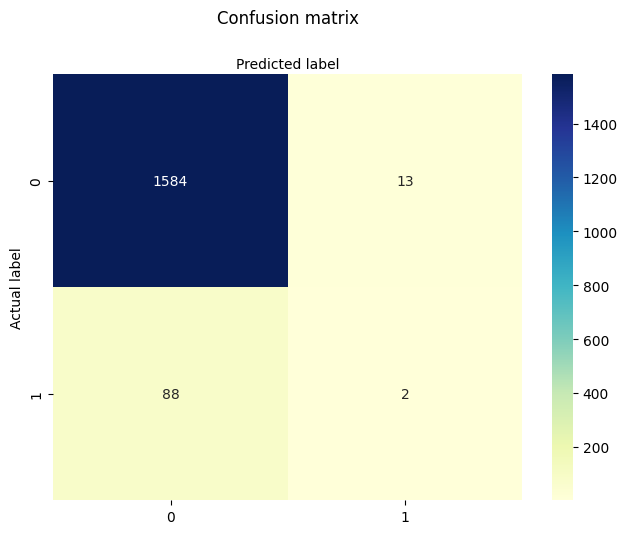

In [12]:
eval(y_test,y_pred)

In [13]:
predictor.evaluate(df_test)

{'accuracy': 0.940130409010077,
 'balanced_accuracy': np.float64(0.5070409796145551),
 'mcc': np.float64(0.0337111081838141),
 'roc_auc': np.float64(0.7990120364572462),
 'f1': np.float64(0.0380952380952381),
 'precision': np.float64(0.13333333333333333),
 'recall': np.float64(0.022222222222222223)}

In [14]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 27.9 MB/s eta 0:00:00
   ━━━━

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor
df=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/healthcare-dataset-stroke-data.csv')
df_train,df_test=train_test_split(df,test_size=0.33,random_state=1)
df_train.shape,df_test.shape

((3423, 12), (1687, 12))

In [3]:
from pycaret.classification import *
s = setup(data = df_train, target = 'stroke', session_id=123,fold=5)

,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(3423, 12)"
4,Transformed data shape,"(3423, 19)"
5,Transformed train set shape,"(2396, 19)"
6,Transformed test set shape,"(1027, 19)"
7,Numeric features,6
8,Categorical features,5
9,Rows with missing values,4.0%


In [4]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9537,0.8328,0.0000,0.0000,0.0000,0.0000,0.0000,0.1100
rf,Random Forest Classifier,0.9537,0.7893,0.0000,0.0000,0.0000,0.0000,0.0000,0.4000
dummy,Dummy Classifier,0.9537,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1100
lr,Logistic Regression,0.9533,0.8398,0.0000,0.0000,0.0000,-0.0008,-0.0021,1.9860
knn,K Neighbors Classifier,0.9533,0.4903,0.0000,0.0000,0.0000,-0.0008,-0.0020,0.1380
et,Extra Trees Classifier,0.9533,0.7718,0.0273,0.4000,0.0507,0.0456,0.0938,0.3220
svm,SVM - Linear Kernel,0.9528,0.4920,0.0000,0.0000,0.0000,-0.0016,-0.0041,0.1220
lightgbm,Light Gradient Boosting Machine,0.9512,0.8100,0.0719,0.3200,0.1170,0.1037,0.1348,0.6820
xgboost,Extreme Gradient Boosting,0.9508,0.8072,0.1261,0.4022,0.1880,0.1702,0.2025,0.1900
ada,Ada Boost Classifier,0.9499,0.7870,0.0455,0.2500,0.0760,0.0635,0.0889,0.3400


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [6]:

xg = create_model('qda')
tuned2 = tune_model(xg)
tuned_predictions = predict_model(tuned2, data=df_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8792,0.5213,0.0435,0.0270,0.0333,-0.0274,-0.0283
1,0.3967,0.6335,0.7727,0.0565,0.1053,0.0215,0.0655
2,0.8038,0.5574,0.2273,0.0610,0.0962,0.0256,0.0327
3,0.4092,0.6383,0.5909,0.0453,0.0841,-0.0013,-0.0037
4,0.6472,0.7385,0.7273,0.0894,0.1592,0.0843,0.1604
Mean,0.6272,0.6178,0.4723,0.0558,0.0956,0.0205,0.0453
Std,0.1979,0.0751,0.2875,0.0205,0.0404,0.0371,0.0658


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9312,0.8315,0.2609,0.2727,0.2667,0.2306,0.2307
1,0.9332,0.8566,0.2273,0.2500,0.2381,0.2032,0.2035
2,0.9269,0.8415,0.3182,0.2593,0.2857,0.2476,0.2491
3,0.9374,0.8589,0.2273,0.2778,0.2500,0.2177,0.2189
4,0.9353,0.8076,0.2273,0.2632,0.2439,0.2103,0.2109
Mean,0.9328,0.8392,0.2522,0.2646,0.2569,0.2219,0.2226
Std,0.0036,0.0187,0.0355,0.0098,0.0173,0.0157,0.0160


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9164,0.8506,0.2111,0.2135,0.2123,0.1682,0.1682


Accuracy: 0.916419679905157
Precision: 0.21348314606741572
Recall: 0.2111111111111111


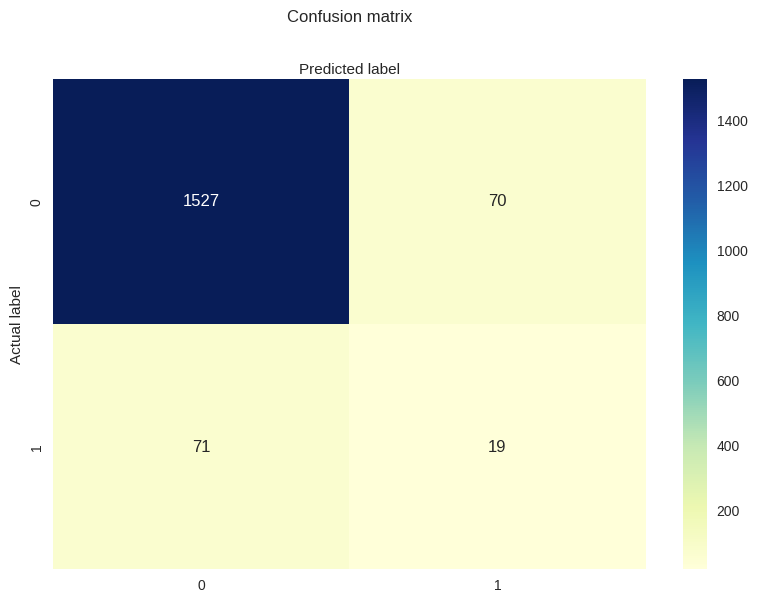

In [15]:


# For example, rename your function to 'evaluate_model':
def evaluate_model(yact,ypred):
    from sklearn import metrics
    print("Accuracy:",metrics.accuracy_score(yact, ypred))
    print("Precision:",metrics.precision_score(yact, ypred))
    print("Recall:",metrics.recall_score(yact, ypred))

    cnf_matrix = metrics.confusion_matrix(yact, ypred)
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    # %matplotlib inline # This is a Jupyter notebook magic command, not standard Python
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# And then call it like this:
evaluate_model(df_test['stroke'],tuned_predictions['prediction_label'])

In [11]:
tuned_predictions['prediction_label']

,prediction_label
4673,0
3232,0
3694,0
1070,0
4163,0
...,...
386,0
3961,0
1608,0
1459,0


In [12]:
df_test['stroke']

,stroke
4673,0
3232,0
3694,0
1070,0
4163,0
...,...
386,0
3961,0
1608,0
1459,0


Reference:

https://www.analyticsvidhya.com/blog/2021/10/beginners-guide-to-automl-with-an-easy-autogluon-example/